<a href="https://colab.research.google.com/github/deeksha200/Retail-Giant-Sales-Forecasting/blob/main/Retail_Giant_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [82]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [83]:
import sklearn
from sklearn.metrics import mean_squared_error

In [84]:
dataset=pd.read_csv("https://raw.githubusercontent.com/deeksha200/Retail-Giant-Sales-Forecasting/main/Global2.csv")
dataset.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,31-07-2012,Consumer,US,2309.650,7,762.1845
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200


In [85]:
dataset.shape

(51290, 6)

In [86]:
dataset.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Quantity      0
Profit        0
dtype: int64

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Quantity    51290 non-null  int64  
 5   Profit      51290 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [88]:
dataset.drop(['Quantity'],axis=1,inplace=True)

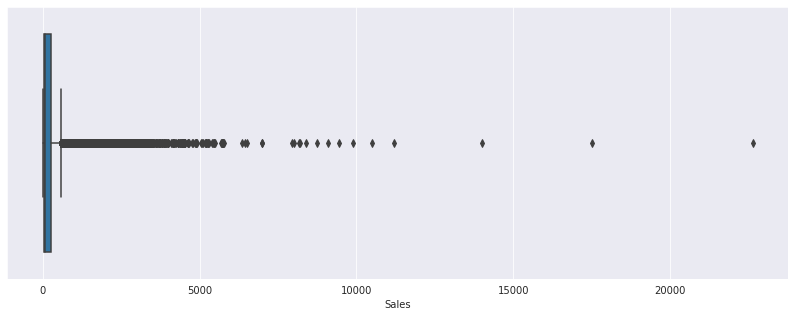

In [89]:
plt.figure(figsize=(14,5))
sns.boxplot(dataset['Sales'])

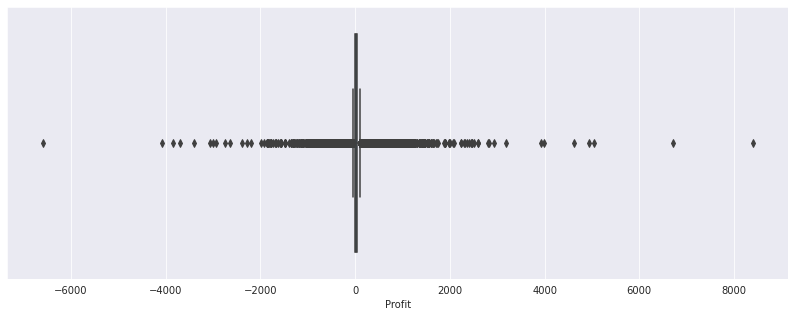

In [90]:
plt.figure(figsize=(14,5))
sns.boxplot(dataset['Profit'])

In [91]:
# plt.figure(figsize=(14,5))
# sns.lineplot(y=dataset['Sales'],x=dataset['Order Date'])

In [92]:
dataset.nunique()

Order Date     1430
Segment           3
Market            7
Sales         22995
Profit        24575
dtype: int64

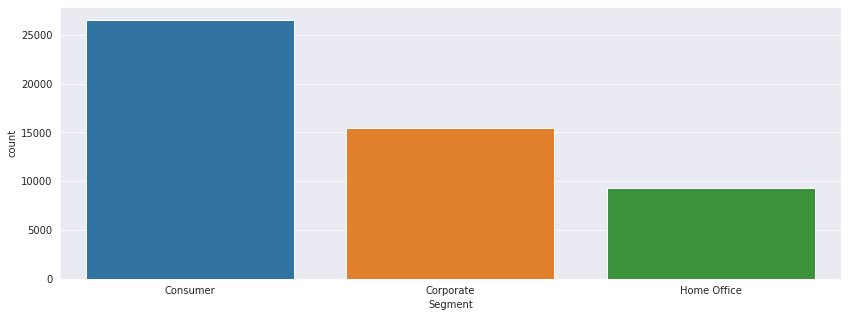

In [93]:
plt.figure(figsize=(14,5))
sns.countplot(dataset['Segment'])

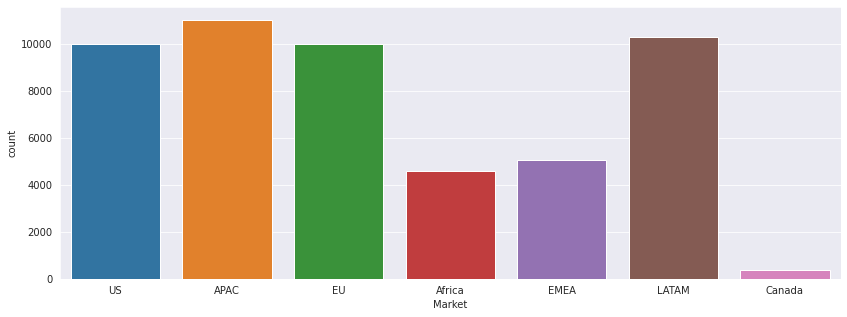

In [94]:
plt.figure(figsize=(14,5))
sns.countplot(dataset['Market'])

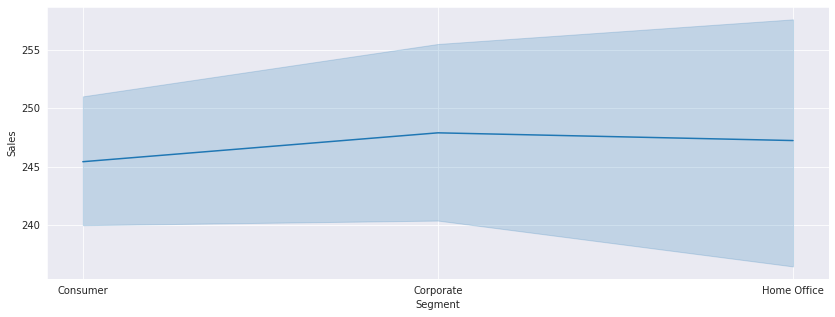

In [95]:
plt.figure(figsize=(14,5))
sns.lineplot(x=dataset['Segment'],y=dataset['Sales'])

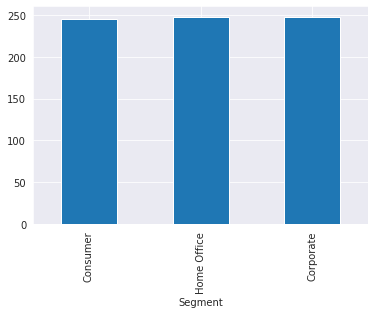

In [96]:
dataset.groupby('Segment')['Sales'].mean().sort_values().plot.bar()

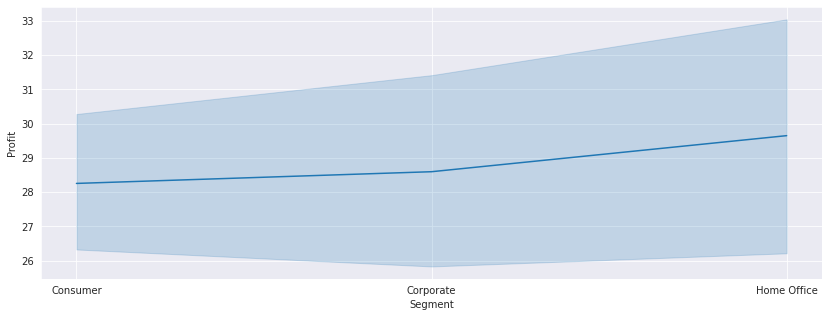

In [97]:
plt.figure(figsize=(14,5))
sns.lineplot(x=dataset['Segment'],y=dataset['Profit'])

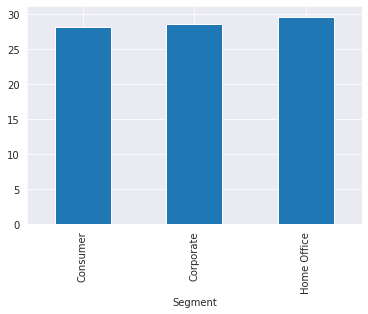

In [98]:
dataset.groupby('Segment')['Profit'].mean().sort_values().plot.bar()

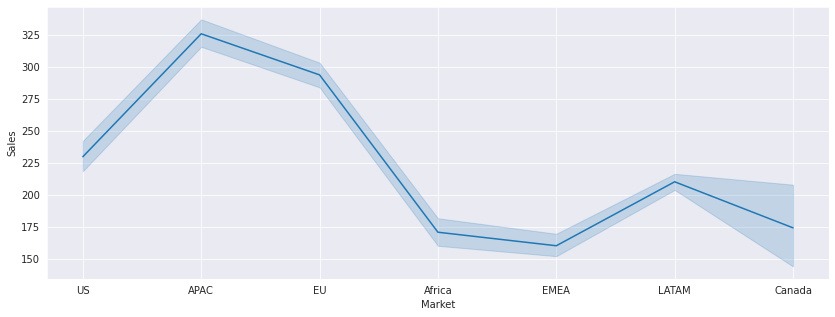

In [99]:
plt.figure(figsize=(14,5))
sns.lineplot(x=dataset['Market'],y=dataset['Sales'])

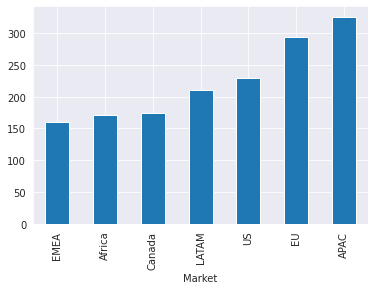

In [100]:
dataset.groupby('Market')['Sales'].mean().sort_values().plot.bar()

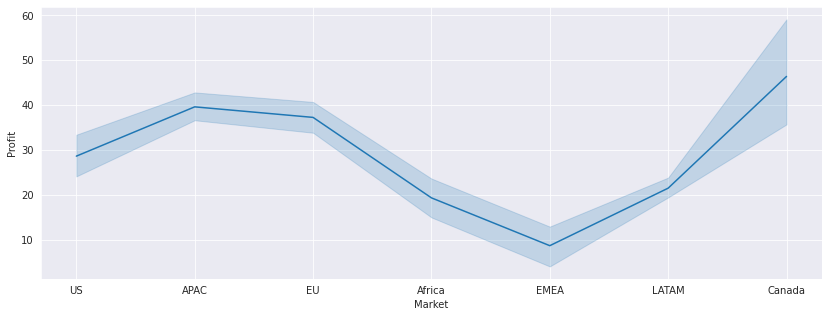

In [101]:
plt.figure(figsize=(14,5))
sns.lineplot(x=dataset['Market'],y=dataset['Profit'])

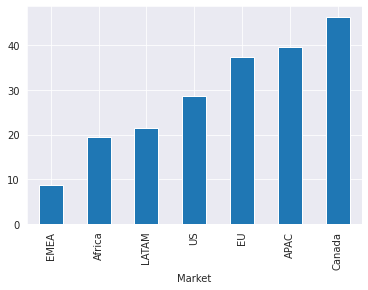

In [102]:
dataset.groupby('Market')['Profit'].mean().sort_values().plot.bar()

In [103]:
# Concatenate the Market and Segment column to get the Market Segment data
dataset['Market_Segment'] = dataset['Market']+'-'+dataset['Segment'] 

In [104]:
dataset.drop(['Market','Segment'],axis=1,inplace=True)
dataset.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US-Consumer
1,05-02-2013,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,5175.171,919.9710,APAC-Consumer
3,28-01-2013,2892.510,-96.5400,EU-Home Office
4,05-11-2013,2832.960,311.5200,Africa-Consumer


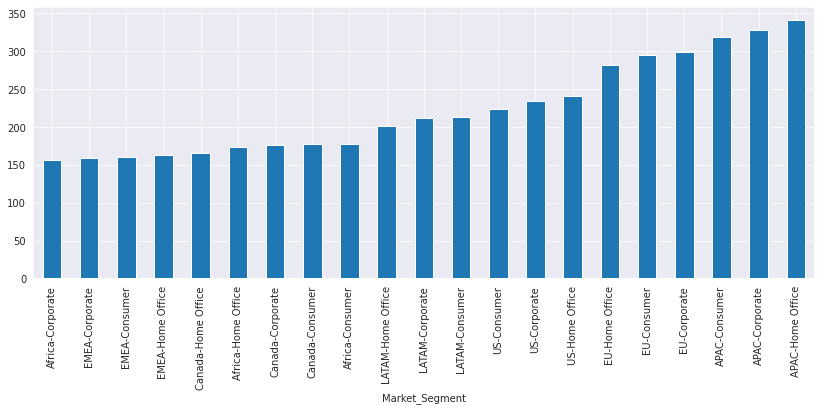

In [105]:
plt.figure(figsize=(14,5))
dataset.groupby('Market_Segment')['Sales'].mean().sort_values().plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

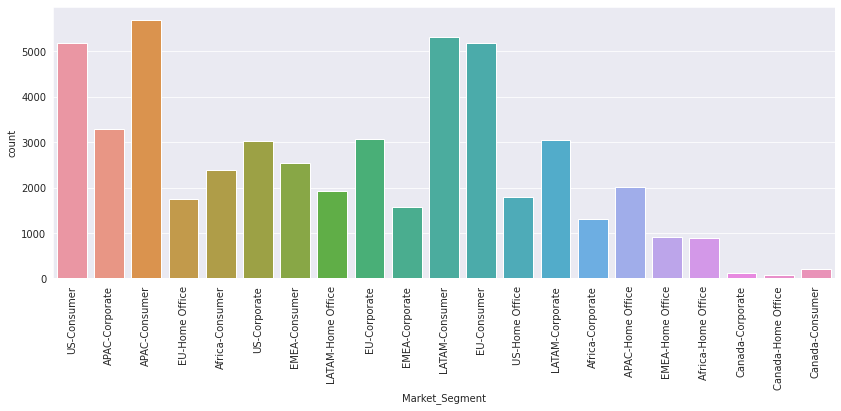

In [106]:
plt.figure(figsize=(14,5))
sns.countplot(dataset['Market_Segment'])
plt.xticks(rotation=90)

In [107]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date']).dt.to_period('m') # Converting the Order Date to month-Year format

In [108]:
dataset.head()

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US-Consumer
1,2013-05,3709.395,-288.7650,APAC-Corporate
2,2013-10,5175.171,919.9710,APAC-Consumer
3,2013-01,2892.510,-96.5400,EU-Home Office
4,2013-05,2832.960,311.5200,Africa-Consumer


In [109]:
dataset.groupby(['Market_Segment', 'Order Date']).sum()

Sales     Profit
Market_Segment Order Date                       
APAC-Consumer  2011-01     18821.9898  2254.4898
               2011-02     23313.3531  4627.8531
               2011-03     26518.4919  2337.8319
               2011-04     12046.0923   633.6423
               2011-05     25941.9000  3838.9500
...                               ...        ...
US-Home Office 2014-08      9036.9855  1168.9436
               2014-09     18312.5080  2788.8755
               2014-10     25045.1610  4104.2505
               2014-11     16151.0440   493.4159
               2014-12     12376.5760  2608.6367

[974 rows x 2 columns]

In [110]:
data_cov = pd.pivot_table(data = dataset, index = "Order Date", columns = "Market_Segment", values = "Profit", aggfunc="sum")
data_cov.head()

Market_Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [111]:
data_cov.shape

(48, 21)

In [112]:
train_len = 42
train = data_cov[0 : train_len]
test = data_cov[train_len : ]

In [113]:
train.shape,test.shape

((42, 21), (6, 21))

In [114]:
# Calculate mean for the train set
train_mean = np.mean(train)
train_mean

Market_Segment
APAC-Consumer         4400.894243
APAC-Corporate        2574.919807
APAC-Home Office      1511.088314
Africa-Consumer        957.707000
Africa-Corporate       412.617571
Africa-Home Office     377.221071
Canada-Consumer        225.987632
Canada-Corporate        90.980294
Canada-Home Office     118.003750
EMEA-Consumer          423.960286
EMEA-Corporate         182.642643
EMEA-Home Office        84.231366
EU-Consumer           3699.977143
EU-Corporate          2216.299429
EU-Home Office        1224.456536
LATAM-Consumer        2295.555697
LATAM-Corporate       1122.633016
LATAM-Home Office      818.398941
US-Consumer           2686.740912
US-Corporate          1754.199083
US-Home Office        1132.065762
dtype: float64

In [115]:
# Calculate standard deviation for the train set
train_std = np.std(train)
train_std

Market_Segment
APAC-Consumer         2300.457687
APAC-Corporate        1364.837734
APAC-Home Office      1523.508658
Africa-Consumer       1254.932072
Africa-Corporate       780.566850
Africa-Home Office     759.322203
Canada-Consumer        282.555788
Canada-Corporate       162.493114
Canada-Home Office     279.632866
EMEA-Consumer         1124.552711
EMEA-Corporate        1160.698430
EMEA-Home Office       651.283095
EU-Consumer           2202.282289
EU-Corporate          1600.336696
EU-Home Office        1148.627937
LATAM-Consumer        1569.632686
LATAM-Corporate        990.360880
LATAM-Home Office      957.275713
US-Consumer           2715.031412
US-Corporate          1880.200775
US-Home Office        1272.476439
dtype: float64

In [116]:
# Calculate Coefficient of variation for the train set
train_CoV = train_std/train_mean
train_CoV=train_CoV.sort_values()
train_CoV

Market_Segment
APAC-Consumer         0.522725
APAC-Corporate        0.530051
EU-Consumer           0.595215
LATAM-Consumer        0.683770
EU-Corporate          0.722076
LATAM-Corporate       0.882177
EU-Home Office        0.938072
APAC-Home Office      1.008219
US-Consumer           1.010530
US-Corporate          1.071829
US-Home Office        1.124030
LATAM-Home Office     1.169693
Canada-Consumer       1.250315
Africa-Consumer       1.310351
Canada-Corporate      1.786025
Africa-Corporate      1.891744
Africa-Home Office    2.012937
Canada-Home Office    2.369695
EMEA-Consumer         2.652495
EMEA-Corporate        6.355024
EMEA-Home Office      7.732073
dtype: float64

In [117]:
# Creating a dataframe CoV displaying the mean, std. dev. and Coeff. of Var. values against each of the market segments
CoV = pd.DataFrame({'Mean' : train_mean, 'Std_Dev' : train_std, 'Coeff_of_Var' : train_CoV})
CoV

,Mean,Std_Dev,Coeff_of_Var
Market_Segment,,,
APAC-Consumer,4400.894243,2300.457687,0.522725
APAC-Corporate,2574.919807,1364.837734,0.530051
APAC-Home Office,1511.088314,1523.508658,1.008219
Africa-Consumer,957.707000,1254.932072,1.310351
Africa-Corporate,412.617571,780.566850,1.891744
Africa-Home Office,377.221071,759.322203,2.012937
Canada-Consumer,225.987632,282.555788,1.250315
Canada-Corporate,90.980294,162.493114,1.786025
Canada-Home Office,118.003750,279.632866,2.369695


In [118]:
# Filter the main data frame such for APAC-Consumer market segment
data_apac_con = dataset[dataset['Market_Segment'] == 'APAC-Consumer']
data_apac_con.head(2)

,Order Date,Sales,Profit,Market_Segment
2,2013-10,5175.171,919.971,APAC-Consumer
6,2011-07,1822.080,564.840,APAC-Consumer


In [119]:
# Group the data by Order Date for sum of Sales
data1 = data_apac_con.groupby(['Order Date'])['Sales'].sum()
data1.head(2)

Order Date
2011-01    18821.9898
2011-02    23313.3531
Freq: M, Name: Sales, dtype: float64

In [120]:
data1 = pd.DataFrame(data1) # Convert to data frame

In [121]:
data1.index = data1.index.to_timestamp() # Converting the index to timestamp

In [122]:
data1.head(5)

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


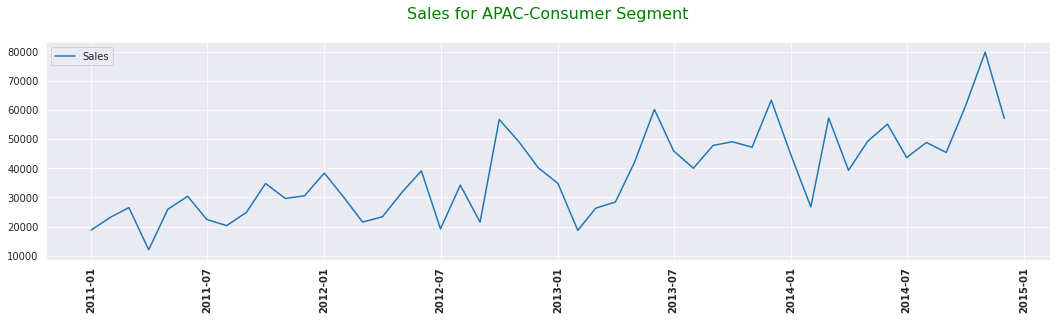

In [123]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Sales')
plt.legend(loc='best')
plt.title('Sales for APAC-Consumer Segment\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

In [124]:
# import scipy
# scipy.__version__

In [125]:
# pip uninstall scipy==1.2.0

In [126]:
# pip install scipy==1.4.1

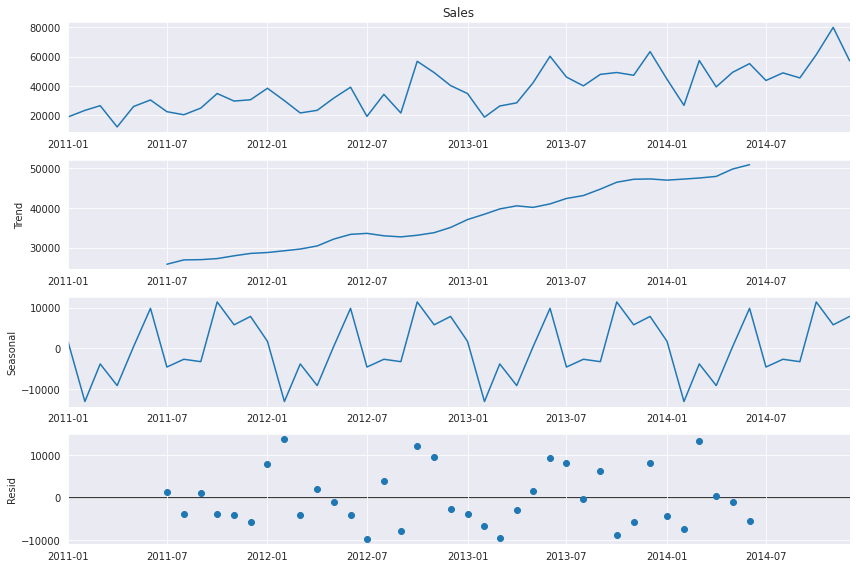

In [127]:
from pylab import rcParams
# from scipy._lib import doccer
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

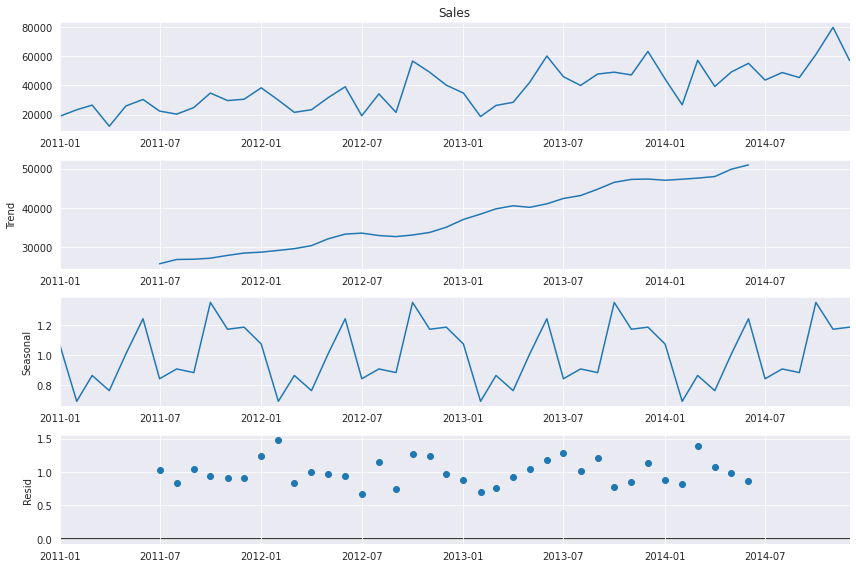

In [128]:
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [129]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test

adf_test(data1['Sales'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.376024
p-value                         0.011804
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


when the test statistics is lower than the critical value,we reject the null hypothesis and infer that the time series is stationary.
So here test statistics = -3.376024 < Critical Value(0.05%) = -2.925338
so series is stationary.

In [130]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [131]:
kpss_test(data1['Sales'])

Results of KPSS Test:
Test Statistic            0.577076
p-value                   0.024720
#Lags Used               10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


if test statistics is < critical value and p-value < 0.05 so we fail to reject the null hypothesis that is time series does not have a unit root,meaning it is trend stationary.
Here Test statistics = 0.577076 > Critical Value(0.05%) = 0.463000 and p-value = 0.024720 < 0.05
so it is non stationary

So as ADF concludes stationarity and KPSS concludes non stationarity the time series is difference stationary.


In [132]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [133]:
# data1['Diff'] = data1['Sales'].diff(1)

In [134]:
data1.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [135]:
# data1=data1.dropna()

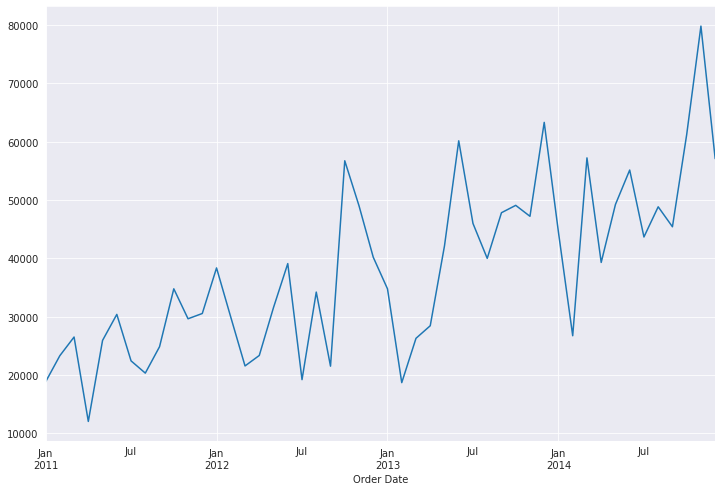

In [136]:
data1['Sales'].plot()

In [137]:
# data1['Diff'].plot()

In [138]:
# # Calculate autocorrelation
# acf_values = acf(data1['Diff'])


In [139]:
# np.round(acf_values,2)

In [140]:
# Plot autocorrelation
# plot_acf(data1['Diff'], lags=30);

In [141]:
# Calculate partial autocorrelation
# pacf_values = pacf(data1['Diff'])

In [142]:
# np.round(pacf_values,2)

In [143]:
# Plot partial autocorrelation
# plot_pacf(data1['Diff'], lags=22);

In [144]:
# !pip install statsmodels --upgrade

**AR MODEL**

In [145]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [146]:
# data1.drop(['Sales'],axis=1,inplace=True)

Box Cox transformation to make variance constant

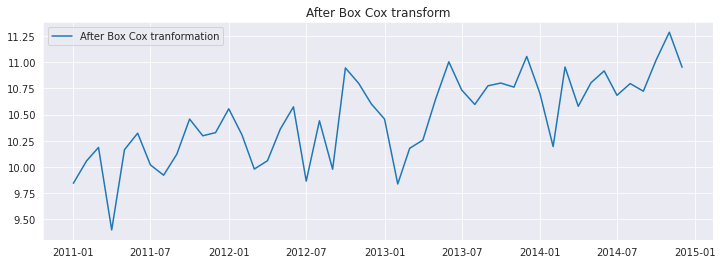

In [147]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Sales'], lmbda=0), index = data1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

Differencing to remove trend

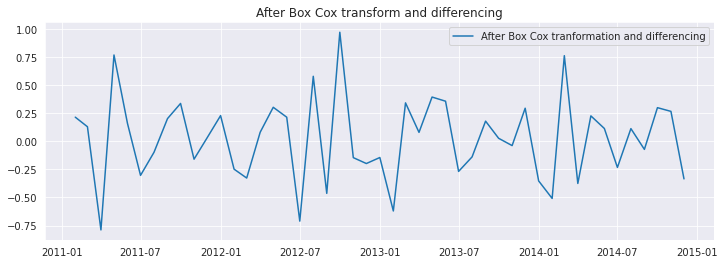

In [148]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [149]:
data_boxcox_diff.dropna(inplace=True) # After shifting the data, drop the first value which is NA

Again check the stationaity of series

ADF Test

In [150]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test

adf_test(data_boxcox_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -4.535011
p-value                         0.000170
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


KPSS Test

In [151]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(data_boxcox_diff)

Results of KPSS Test:
Test Statistic            0.156456
p-value                   0.100000
#Lags Used               10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Now both adf and kpss test says it is stationary

In [152]:
# Calculate autocorrelation
acf_values = acf(data_boxcox_diff)
np.round(acf_values,2)

array([ 1.  , -0.41, -0.05, -0.03, -0.14,  0.16, -0.1 ,  0.17, -0.03,
       -0.18, -0.01,  0.08,  0.21, -0.11, -0.04, -0.05, -0.17,  0.35,
       -0.25,  0.21, -0.12, -0.11,  0.13, -0.06,  0.12, -0.03, -0.07,
        0.03, -0.05,  0.06,  0.02,  0.02, -0.13,  0.03,  0.16, -0.17,
        0.09,  0.02, -0.06,  0.02, -0.02])

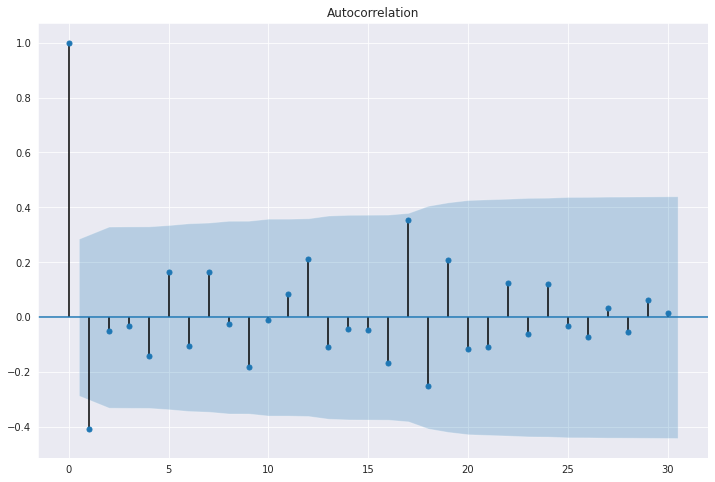

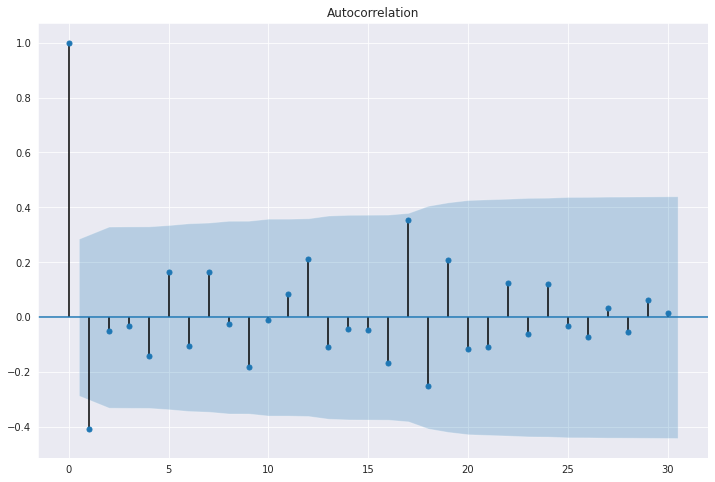

In [153]:
plot_acf(data_boxcox_diff.values, lags=30)

In [154]:
# # Calculate autocorrelation
# pacf_values = pacf(data_boxcox_diff)
# np.round(pacf_values,2)

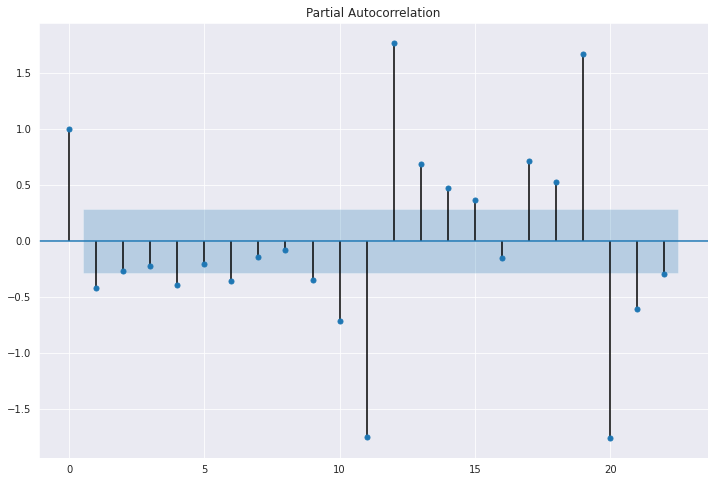

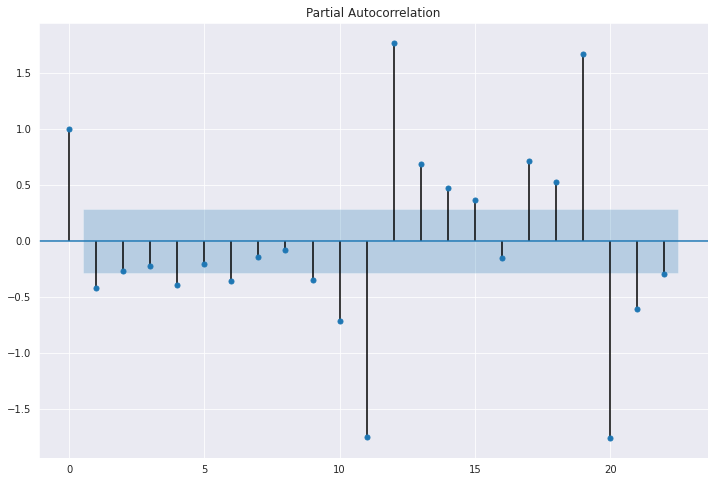

In [155]:
plot_pacf(data_boxcox_diff.values, lags=22)

**Train-Test Split**

In [156]:
train_len = 42
train = data1[0 : train_len]
test = data1[train_len : ]
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [157]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.024251
ar.L1    -0.406725
sigma2    0.124377
dtype: float64


In [158]:
# Recover original time series

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

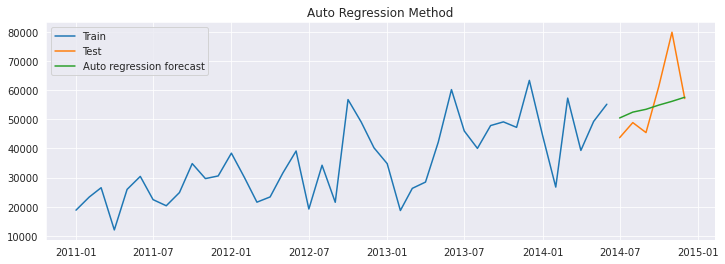

In [159]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [160]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results
# results = pd.concat([results, tempResults])
# results = results[['Method', 'RMSE', 'MAPE']]
# results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,10988.64,13.55


In [161]:
# from matplotlib import pyplot
# # train autoregression
# model = AutoReg(train_data_boxcox_diff , lags=11)
# model_fit = model.fit()
# print(model_fit.summary())
# print('Coefficients: %s' % model_fit.params)
# # make predictions
# predictions = model_fit.predict(start=len(train_data_boxcox_diff), end=len(train_data_boxcox_diff)+len(test_data_boxcox_diff)-1, dynamic=False)
# for i in range(len(predictions)):
# 	print('predicted=%f, expected=%f' % (predictions[i], test_data_boxcox_diff[i]))
# rmse = sqrt(mean_squared_error(test_data_boxcox_diff, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot results
# plt.figure(figsize=(12,4))
# plt.plot(train_data_boxcox_diff, label='Training data')
# plt.plot(test_data_boxcox_diff, color='gray', label='Testing data')
# plt.plot(predictions, color='orange', label='Predictions')
# plt.legend();
# pyplot.show()

**MA MODEL**

In [162]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.021411
ma.L1    -0.999860
sigma2    0.079380
dtype: float64


In [163]:
# Recover original time series

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

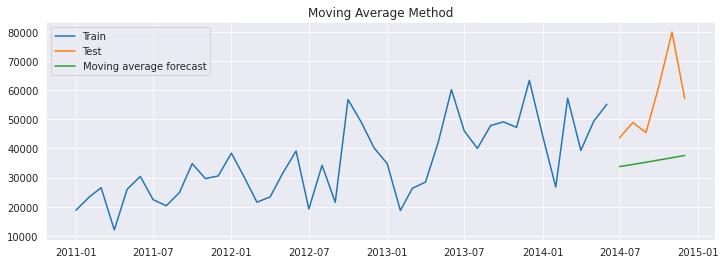

In [164]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(data1['Sales'][:train_len], label='Train')
plt.plot(data1['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [165]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23367.77,33.95


In [166]:
# from statsmodels.tsa.arima.model import ARIMA
# # train moving average
# model_ma = ARIMA(train, order=(0,0,1))
# model_fit_ma = model_ma.fit()
# print(model_fit_ma.summary())
# print('Coefficients: %s' % model_fit_ma.params)
# # make predictions
# predictions = model_fit_ma.predict(start=len(train_data_boxcox_diff), end=len(train_data_boxcox_diff)+len(test_data_boxcox_diff)-1, dynamic=False)
# for i in range(len(predictions)):
# 	print('predicted=%f, expected=%f' % (predictions[i], test_data_boxcox_diff[i]))
# rmse = sqrt(mean_squared_error(test_data_boxcox_diff, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot results
# plt.figure(figsize=(12,4))
# plt.plot(train_data_boxcox_diff, label='Training data')
# plt.plot(test_data_boxcox_diff, color='gray', label='Testing data')
# plt.plot(predictions, color='orange', label='Predictions')
# plt.legend();
# pyplot.show()

**ARMA MODEL**

In [167]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.021465
ar.L1     0.074569
ma.L1    -0.999961
sigma2    0.079221
dtype: float64


In [168]:
# Recover original time series

y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

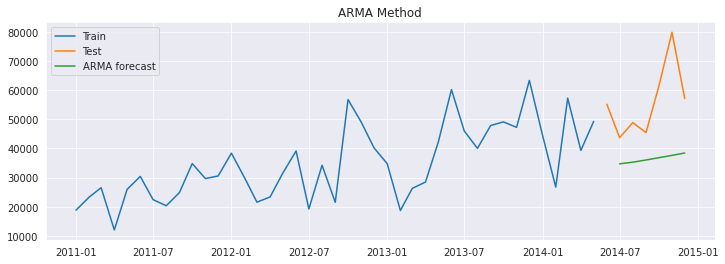

In [169]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( data1['Sales'][:train_len-1], label='Train')
plt.plot(data1['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [170]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23367.77,33.95
0,Autoregressive moving average (ARMA) method,22659.91,32.41


**ARIMA MODEL**

In [171]:
model = ARIMA(train_data_boxcox_diff, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.392251
ma.L1    -0.998998
sigma2    0.127690
dtype: float64


In [172]:
# Recover original time series forecast

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

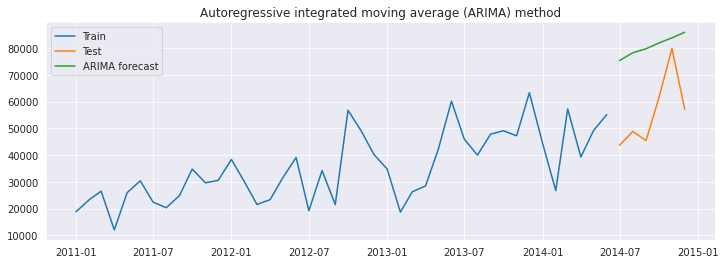

In [173]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [174]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23367.77,33.95
0,Autoregressive moving average (ARMA) method,22659.91,32.41
0,Autoregressive integrated moving average (ARIM...,26811.77,49.55


**AUTO ARIMA MODEL**

In [175]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 25.8 MB/s 
     |████████████████████████████████| 9.8 MB 59.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [176]:
# from statsmodels.tsa.arima_model import ARIMA

# import pmdarima as pm

# model = pm.auto_arima(data_boxcox_diff, start_p=1, start_q=1,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=4, max_q=4, # maximum p and q
#                       m=1,              # frequency of series
#                       d=None,           # let model determine 'd'
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

# print(model.summary())

In [177]:
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

**SARIMA MODEL**

In [178]:
 import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data_boxcox_diff, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=47.644, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=35.336, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=45.737, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=38.974, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=36.242, Time=0.78 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=36.484, Time=0.32 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=34.489, Time=0.21 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=36.483, Time=0.59 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,0,0)(0,1,1)[12]             : AIC=32.513, Time=0.13 sec


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   47
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 -13.256
Date:                              Tue, 04 Oct 2022   AIC                             32.513
Time:                                      09:58:49   BIC                             37.179
Sample:                                  02-01-2011   HQIC                            34.123
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4933      0.188     -2.628      0.009      -0.861      -0.125
ma.S.L12      -0.6722      0.591     -1.137      0.255      -1.831       0.486
sigma2         0.1025      0.047      2.188      0.029       0.011       0.194
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.49   Prob(JB):                         0.54
Heteroskedasticity (H):               0.62   Skew:                             0.17
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 0, 0), seasonal_order=(0, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1       0.491989
ma.S.L12   -0.387268
sigma2      0.134776
dtype: float64


In [180]:
# # Recover original time series forecast
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
# y_hat_sarima = data_boxcox_diff.copy()
# y_hat_sarima['sarima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox_diff'].cumsum()
# y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox'].add(data_boxcox[0])
# y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

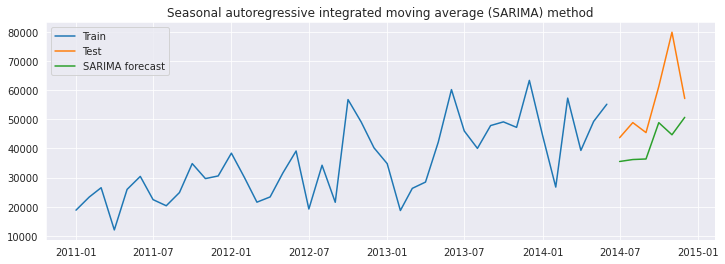

In [181]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [182]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23367.77,33.95
0,Autoregressive moving average (ARMA) method,22659.91,32.41
0,Autoregressive integrated moving average (ARIM...,26811.77,49.55
0,Seasonal autoregressive integrated moving aver...,17030.28,23.35


In [183]:
# from math import sqrt
# from multiprocessing import cpu_count
# from joblib import Parallel
# from joblib import delayed
# from warnings import catch_warnings
# from warnings import filterwarnings
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error
 
# # one-step sarima forecast
# def sarima_forecast(history, config):
# 	order, sorder, trend = config
# 	# define model
# 	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
# 	# fit model
# 	model_fit = model.fit(disp=False)
# 	# make one step forecast
# 	yhat = model_fit.predict(len(history), len(history))
# 	return yhat[0]
 
# # root mean squared error or rmse
# def measure_rmse(actual, predicted):
# 	return sqrt(mean_squared_error(actual, predicted))
 
# # split a univariate dataset into train/test sets
# def train_test_split(data, n_test):
# 	return data[:-n_test], data[-n_test:]
 
# # walk-forward validation for univariate data
# def walk_forward_validation(data, n_test, cfg):
# 	predictions = list()
# 	# split dataset
# 	train, test = train_test_split(data, n_test)
# 	# seed history with training dataset
# 	history = [x for x in train]
# 	# step over each time-step in the test set
# 	for i in range(len(test)):
# 		# fit model and make forecast for history
# 		yhat = sarima_forecast(history, cfg)
# 		# store forecast in list of predictions
# 		predictions.append(yhat)
# 		# add actual observation to history for the next loop
# 		history.append(test[i])
# 	# estimate prediction error
# 	error = measure_rmse(test, predictions)
# 	return error
 
# # score a model, return None on failure
# def score_model(data, n_test, cfg, debug=False):
# 	result = None
# 	# convert config to a key
# 	key = str(cfg)
# 	# show all warnings and fail on exception if debugging
# 	if debug:
# 		result = walk_forward_validation(data, n_test, cfg)
# 	else:
# 		# one failure during model validation suggests an unstable config
# 		try:
# 			# never show warnings when grid searching, too noisy
# 			with catch_warnings():
# 				filterwarnings("ignore")
# 				result = walk_forward_validation(data, n_test, cfg)
# 		except:
# 			error = None
# 	# check for an interesting result
# 	if result is not None:
# 		print(' > Model[%s] %.3f' % (key, result))
# 	return (key, result)
 
# # grid search configs
# def grid_search(data, cfg_list, n_test, parallel=True):
# 	scores = None
# 	if parallel:
# 		# execute configs in parallel
# 		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
# 		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
# 		scores = executor(tasks)
# 	else:
# 		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
# 	# remove empty results
# 	scores = [r for r in scores if r[1] != None]
# 	# sort configs by error, asc
# 	scores.sort(key=lambda tup: tup[1])
# 	return scores
 
# # create a set of sarima configs to try
# def sarima_configs(seasonal=[0]):
# 	models = list()
# 	# define config lists
# 	p_params = [0, 1, 2]
# 	d_params = [0, 1]
# 	q_params = [0, 1, 2]
# 	t_params = ['n','c','t','ct']
# 	P_params = [0, 1, 2]
# 	D_params = [0, 1]
# 	Q_params = [0, 1, 2]
# 	m_params = seasonal
# 	# create config instances
# 	for p in p_params:
# 		for d in d_params:
# 			for q in q_params:
# 				for t in t_params:
# 					for P in P_params:
# 						for D in D_params:
# 							for Q in Q_params:
# 								for m in m_params:
# 									cfg = [(p,d,q), (P,D,Q,m), t]
# 									models.append(cfg)
# 	return models
 
# if __name__ == '__main__':
# 	# load dataset
# 	# series = read_csv('monthly-car-sales.csv', header=0, index_col=0)
# 	data = data_boxcox_diff.values
# 	print(data.shape)
# 	# data split
# 	n_test = 4
# 	# model configs
# 	cfg_list = sarima_configs(seasonal=[0,6,12])
# 	# grid search
# 	scores = grid_search(data, cfg_list, n_test)
# 	print('done')
# 	# list top 3 configs
# 	for cfg, error in scores[:3]:
# 		print(cfg, error)

In [184]:
# [(1, 0, 0), (1, 0, 1, 12), 'ct'] 4901.571089780862
# [(0, 0, 0), (1, 0, 1, 12), 't'] 5466.113690747886
# [(0, 0, 2), (2, 1, 0, 12), 'n'] 7522.809580521317

In [185]:
# [(1, 0, 2), (1, 1, 2, 12), 'c'] 0.09566143294831687
# [(2, 1, 2), (1, 1, 2, 12), 'n'] 0.104251851414058
# [(0, 0, 1), (1, 1, 2, 6), 'n'] 0.11747902984981738

In [186]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 0, 2), seasonal_order=(1, 1, 2, 12),trend='c') 
model_fit = model.fit()
print(model_fit.params)

intercept    0.203988
ar.L1        0.584081
ma.L1       -0.746195
ma.L2       -0.121278
ar.S.L12    -0.994018
ma.S.L12    -0.003259
ma.S.L24    -0.996736
sigma2       0.045681
dtype: float64


In [187]:
# y_hat_sarima_1 = data_boxcox_diff.copy()
# y_hat_sarima_1['sarima_forecast_boxcox_diff_1'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# y_hat_sarima_1['sarima_forecast_boxcox_1'] = y_hat_sarima_1['sarima_forecast_boxcox_diff_1'].cumsum()
# y_hat_sarima_1['sarima_forecast_boxcox_1'] = y_hat_sarima_1['sarima_forecast_boxcox_1'].add(data_boxcox[0])
# y_hat_sarima_1['sarima_forecast_1'] = np.exp(y_hat_sarima_1['sarima_forecast_boxcox_1'])

In [188]:
# Recover original time series forecast

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

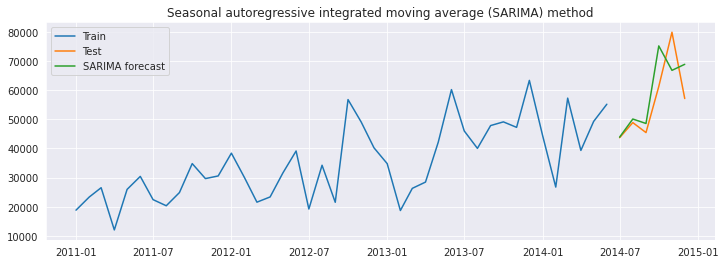

In [189]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [190]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method using GridSearch'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23367.77,33.95
0,Autoregressive moving average (ARMA) method,22659.91,32.41
0,Autoregressive integrated moving average (ARIM...,26811.77,49.55
0,Seasonal autoregressive integrated moving aver...,17030.28,23.35
0,Seasonal autoregressive integrated moving aver...,9252.72,11.58


In [191]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model parameters
span = 12 
alpha = 2 / (span + 1)

# Train the model
model = SimpleExpSmoothing(train_data_boxcox)
result = model.fit(smoothing_level=alpha, optimized=False)
# predictions = results.forecast(steps=6)
y_hat_smooth = data_boxcox_diff.copy()
y_hat_smooth['smooth_forecast_boxcox'] = result.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_smooth['smooth_forecast'] = np.exp(y_hat_smooth['smooth_forecast_boxcox'])
# Evaluate
# rmse = mean_squared_error(test['Sales'], predictions, squared=False)

# # Plot
# plt.title(f'Airline passengers Simple Exponential Smoothing predictions\nRMSE = {np.round(rmse, 2)}', size=20)
# plt.plot(train['Sales'], label='Training data')
# plt.plot(test['Sales'], color='gray', label='Testing data')
# plt.plot(predictions, color='orange', label='Predictions')
# plt.legend();

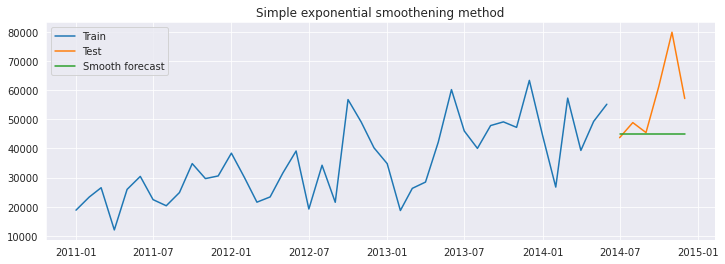

In [192]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_smooth['smooth_forecast'][test.index.min():], label='Smooth forecast')
plt.legend(loc='best')
plt.title('Simple exponential smoothening method')
plt.show()

In [193]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Additive model
model_add = ExponentialSmoothing(train_data_boxcox, trend='add')
results_add = model_add.fit()
# predictions_add = results_add.forecast(steps=24)
y_hat_expo_add = data_boxcox_diff.copy()
y_hat_expo_add['expo_add_forecast_boxcox'] = results_add.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_expo_add['expo_add_forecast'] = np.exp(y_hat_expo_add['expo_add_forecast_boxcox'])

# Multiplicative model
model_mul = ExponentialSmoothing(train_data_boxcox, trend='mul')
results_mul = model_mul.fit()
# predictions_mul = results_mul.forecast(steps=24)
y_hat_expo_mul = data_boxcox_diff.copy()
y_hat_expo_mul['expo_mul_forecast_boxcox'] = results_mul.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_expo_mul['expo_mul_forecast'] = np.exp(y_hat_expo_mul['expo_mul_forecast_boxcox'])


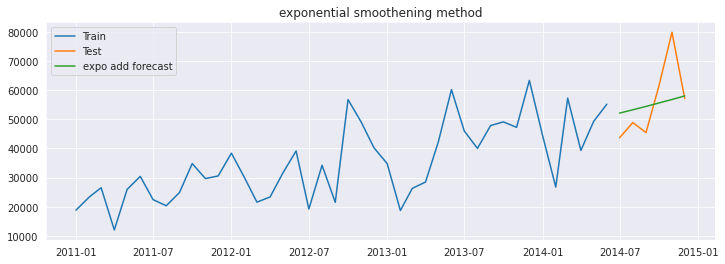

In [194]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_expo_add['expo_add_forecast'][test.index.min():], label='expo add forecast')
plt.legend(loc='best')
plt.title('exponential smoothening method')
plt.show()

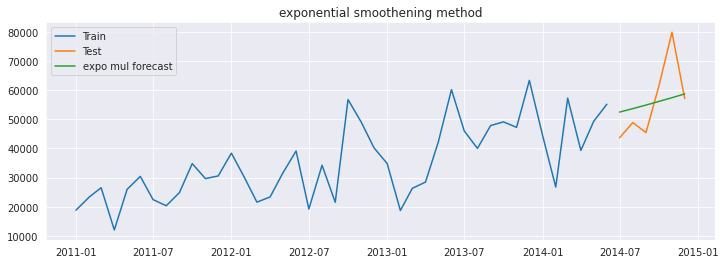

In [195]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_expo_mul['expo_mul_forecast'][test.index.min():], label='expo mul forecast')
plt.legend(loc='best')
plt.title('exponential smoothening method')
plt.show()

In [196]:
# Multiplicative trend / Additive seasonality model
model_mul_add = ExponentialSmoothing(train_data_boxcox, trend='mul', seasonal='add', seasonal_periods=12)
results_mul_add = model_mul_add.fit()
# predictions_mul_add = results_mul_add.forecast(steps=24)
# predictions_add = results_add.forecast(steps=24)
y_hat_1= data_boxcox_diff.copy()
y_hat_1['forecast_boxcox_1'] = results_mul_add.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_1['forecast_1'] = np.exp(y_hat_1['forecast_boxcox_1'])
# Multiplicative trend / Multiplicative seasonality model
model_mul_mul = ExponentialSmoothing(train_data_boxcox, trend='mul', seasonal='mul', seasonal_periods=12)
results_mul_mul = model_mul_mul.fit()
# predictions_mul_mul = results_mul_mul.forecast(steps=24)
y_hat_2= data_boxcox_diff.copy()
y_hat_2['forecast_boxcox_2'] = results_mul_mul.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_2['forecast_2'] = np.exp(y_hat_2['forecast_boxcox_2'])

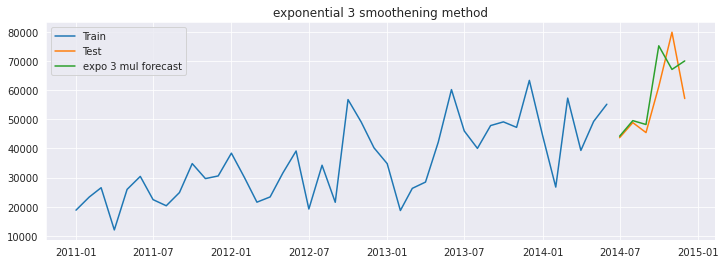

In [197]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_1['forecast_1'][test.index.min():], label='expo 3 mul forecast')
plt.legend(loc='best')
plt.title('exponential 3 smoothening method')
plt.show()

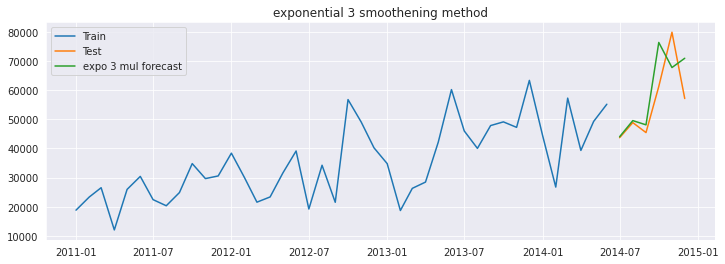

In [198]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_2['forecast_2'][test.index.min():], label='expo 3 mul forecast')
plt.legend(loc='best')
plt.title('exponential 3 smoothening method')
plt.show()

In [199]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_1['forecast_1'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_1['forecast_1'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Exponential 3 moving average'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23367.77,33.95
0,Autoregressive moving average (ARMA) method,22659.91,32.41
0,Autoregressive integrated moving average (ARIM...,26811.77,49.55
0,Seasonal autoregressive integrated moving aver...,17030.28,23.35
0,Seasonal autoregressive integrated moving aver...,9252.72,11.58
0,Exponential 3 moving average,9420.79,11.67
